In [1]:
#importlibraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("/home/futures/Downloads/diabetes2.xls")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
#read csv file
df1 = pd.DataFrame.from_dict(df)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1.shape

(768, 9)

#preprocessing

In [5]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
null_counts = df1.isnull().sum()
null_counts

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#to remove the outlears

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

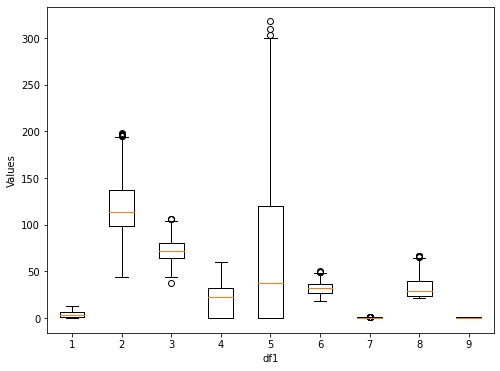

In [8]:
#boxplot
plt.figure(figsize=(8,6 ))
plt.boxplot(df1)
plt.xlabel('df1')
plt.ylabel('Values')
plt.show()

In [9]:
df1.shape

(639, 9)

#heatmap presentation

In [10]:
#correlation 
corr_matrix = df1.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


In [11]:
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492740
BMI                         0.269371
Age                         0.263344
Pregnancies                 0.227987
BloodPressure               0.183298
DiabetesPedigreeFunction    0.179072
Insulin                     0.097746
SkinThickness               0.030676
Name: Outcome, dtype: float64

In [12]:
#target variable
X=df1.drop("Outcome",axis=1)
y=df1["Outcome"]

In [13]:
#test_train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=65)

In [14]:
# create an instance of StandardScaler
scaler = StandardScaler()

In [15]:
#fit the data using the model 
model=DecisionTreeClassifier( criterion='entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
#check the model fit score

model.score(X_train,y_train)

0.7990654205607477

In [17]:
#model prediction
y_pred=model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7298578199052133

In [19]:

#Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))



Training set score: 0.7991
Test set score: 0.7299


In [20]:
from sklearn.metrics import mean_squared_error
import math


In [21]:
mse = mean_squared_error(y_test, y_pred)

# calculate root mean squared error
rmse = math.sqrt(mse)

print("RMSE:", rmse)

RMSE: 0.5197520371242298


In [22]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[130,  10],
       [ 47,  24]])

In [23]:
#evaluate precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [24]:
print(precision)
print(recall)

0.7058823529411765
0.3380281690140845


here the precision: false positives ie,cases that are predicted as positive but are actually negative.
recall: false negatives ie,cases that are predicted as neative but are actually positive.
